# Logistic Regression

Despite the name, this model is a binary __classification model__ that will tell us the probability of a point belonging to a class rather than another.

## Theoretical aspects

### Odds

In a binary classification problem, let $p$ be the probability of the positive class. The _odds_ function $f(p)$ is defined as the ratio between the probability of the positive class and the probability of the negative class:

$$
    f(p) = \frac{p}{1 - p}
$$

By plotting this function we reasonably see that when $p\to 1$, $f(p)\to \infty$ meanwhile, when $p\to 0$, $f(p)\to 0$

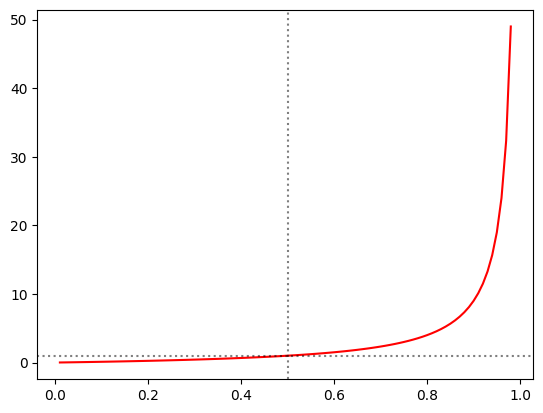

In [1]:
import matplotlib.pyplot as plt
import numpy as np

p = np.arange(0.01, 0.99, 0.01)

odds_ratio = p / (1 - p)

plt.plot(p, odds_ratio, color = "r")
plt.axvline(0.5, color='k', alpha = 0.5, linestyle = ":")
plt.axhline(1.0, color='k', alpha = 0.5, linestyle = ":")

### Logit function

We can now define the __logit__ function as $l(p) = \log(f(p))$, reason why it is also called _log-odds_ function:

$$
    \text{logit}(p) = l(p) = \log\left( \frac{p}{1 - p} \right)
$$

The _logit_ function is a monotonic transformation of the odds function $f$ as follows:

$$
    l(p)\,\, : \,\, \left[0, 1\right] \,\longrightarrow\, \mathopen]-\infty, +\infty\mathclose[
$$

The transformation maps the range $\left[0, 1\right]$ into the set of real numbers $\mathbb{R}$ as shown in the plot below


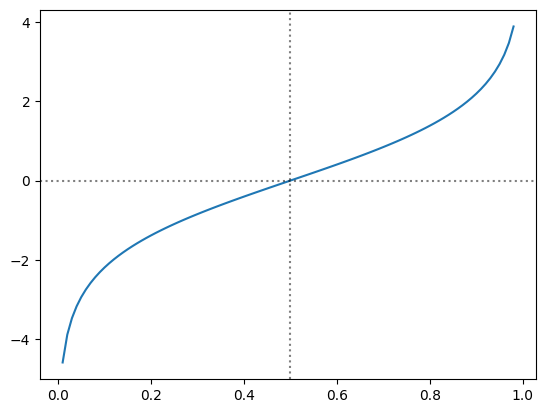

In [2]:
plt.plot(p, np.log(odds_ratio))

plt.axvline(0.5, color='k', alpha = 0.5, linestyle = ":")
plt.axhline(0.0, color='k', alpha = 0.5, linestyle = ":")

### Logistic $sigmoid$ function

We can now start to denote a vital function. If $p$ is the probability that a point $x$ in the dataset is classified in the positive class ($y = 1$) - which can be written as $p(y = 1 \,|\, x)$ - we can try to link this relationship with the _logit_ function as follows:

$$
    l\left(p(y = 1 \,|\, x)\right) = w_0x_0 + w_1x_1 + \dots + w_mx_m = w^Tx = z
$$

We can now inverse this relationship to understand how to calculate $z = w^Tx$ as follows:

$$
    z = \log\left( \frac{p}{1 - p} \right) \,\, \to \,\, e^z = \frac{p}{1 - p}
$$
$$
    (1 - p) e^z = p \,\, \to \,\, e^z - pe^z = p \,\, \to \,\, e^z = p(1 + e^z)
$$
$$
    p = \frac{e^z}{1 + e^z} \,\, = \,\, \boxed{ \frac{1}{1 + e^{-z}} }
$$

We will call this function, $\sigma(z)$, logistic __sigmoid__ function
$$
    \sigma(z) = \frac{1}{1 + e^{-z}}
$$

As we can see from the plots, in a monodimensional world, the sigmoid function is a probability distribution that indicates, based on the position of the monodimensional plane, what is the probability of a point being in the positive class. Reasonably, the more we go $\infty$, the more the probability decreases and vice versa.

Ideally, for a bi-dimensional plane, the function $\sigma$ would be a 3-dimensional wave that describes the distribution for the plane. For dimensions larger than two we cannot imagine the function but it does exist.


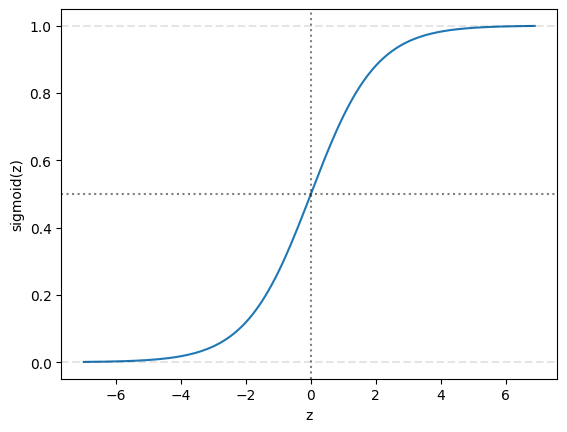

In [3]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)

sigma_z = sigmoid(z)

plt.plot(z, sigma_z)
plt.axvline(0.0, color='k', alpha = 0.5, linestyle = ":")
plt.axhline(0.5, color='k', alpha = 0.5, linestyle = ":")
#plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('sigmoid(z)')

plt.axhline(1.0, color='k', alpha = 0.1, linestyle = "--")
plt.axhline(0.0, color='k', alpha = 0.1, linestyle = "--")


## Logistic regression classifier

If we plug the sigmoid function $\sigma(z) = \sigma(w^Tx)$ at the output of a _perceptron_, we can obtain the probability that the object $x$ in the datapoint belongs to the positive class. To do such a thing we can decide a _threshold_ probability $\overline{p}$ and when $\sigma(w^Tx) > \overline{p}$ the classifier will label the point $x$ belonging to the positive class.

### Initial setup 

After setting the random seed, and making it deterministic for the dataset generation, we define the $X$ monodimensional matrix, creating the positive and negative class. After the generations of the points we are plotting the points to visualize their distribution.

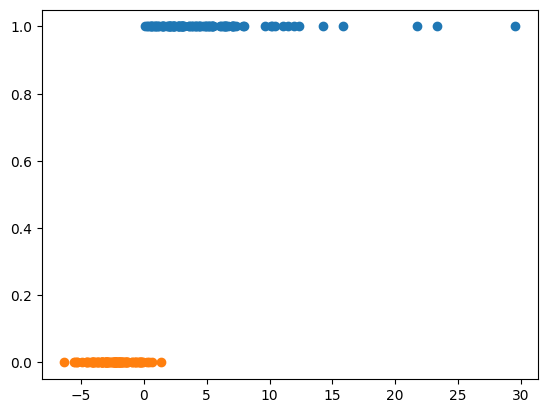

In [4]:
# set random seed
np.random.seed(123)

# generate N points per class
N = 100

# draw samples for X1 in a monodimensional plane
X1_1 = np.random.exponential(scale = 5.5, size = N) 

# we would have the points in the same axis, we are shifting them just to visualize them better
X1_2 = np.random.normal(loc = -2.5, scale = 1.5, size = N)

# set labels
y1 = np.ones(N)
y2 = np.zeros(N)

# plot the two classes
plt.scatter(X1_1, y1)
plt.scatter(X1_2, y2)

After plotting the classes we create the two matrixes that will be used for the training part

In [5]:
# write your answer here
X = np.stack((np.ones(N * 2),
              np.concatenate((X1_1, X1_2))), 
             axis = 1)

y = np.concatenate((y1, y2))

### Learning script

After defining the weight vector $w$ and the _hyperparameters_ $\eta$, <tt>batch_size</tt>, <tt>max_epochs</tt> and <tt>errors_epoch</tt> we start to train our model.

First of all we compute the value of $\varphi(w^TX)$ and use it to calculate the <tt>cost</tt>. We are using the __mini-batch__ approach to improve the computational aspect so we create the batch of 10 elements and use it to create the new vector of weight using the Logistic Regression Classifier learning rule:

$$
    \theta_\text{NEW} = \theta_\text{OLD} + \frac{\eta}{m}X^T\left( h_\theta(X) - y \right)
$$


In [6]:
# generate w_0,....,w_n
w = np.random.randn(2)

# set learning rate 
eta = 1e-2

# set mini-batch size
batch_size = 50

# set max epochs
max_epochs = 100

# set errors per epoch
errors_epoch = np.zeros(max_epochs)

# start training
for epochs in range(max_epochs):
    
    # output → h(X)
    logreg_output = sigmoid(np.dot(X, w))

    # compute the log loss
    cost = (-y.dot(np.log(logreg_output)) - ((1 - y).dot(np.log(1 - logreg_output))))

    errors_epoch[epochs] = cost
    
    # compute (quantity) of error
    errors = (y - logreg_output)
    
    # generate random permutation for stochastic gradient descent
    rand_perm = np.random.permutation(range(y.shape[0]))
    X = X[rand_perm, :]
    y = y[rand_perm]
    
    # mini-batch learning
    for j in range(0, y.shape[0], batch_size):
        
        X_batch = X[j:(j + batch_size), :]
        
        y_batch = y[j:(j + batch_size)]
        
        # output
        logreg_output = sigmoid(np.dot(X_batch, w))
        
        errors = (y_batch - logreg_output)
        
        # w += eta * dJ / dw
        w = w + eta * np.dot(np.transpose(X_batch), errors) / X_batch.shape[0]   

print(w)

[-0.35858446  1.13275893]


### Plots

After finishing the training of the model we plot the solution computed during the algorithm and also the error (_loss_) function. By watching the first plot we can see our sigmoid function $\varphi$. In the second graph we can observe that the loss function decreases: with a good model the function should be near zero, and in this case it is.

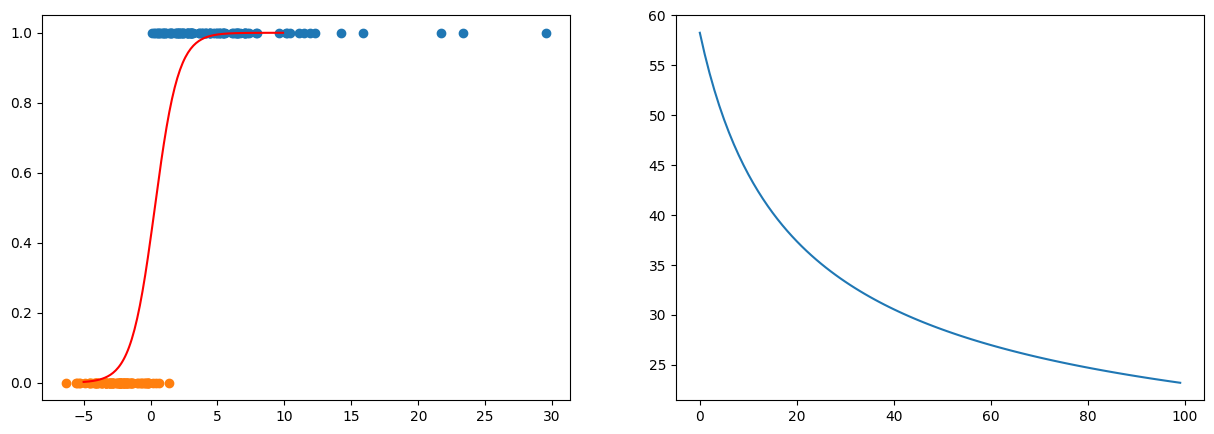

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=False)

axs[0].scatter(X1_1, y1)
axs[0].scatter(X1_2, y2)
#plt.scatter(X1_1, y1)
#plt.scatter(X1_2, y2)

zz = np.arange(-5, 10, 0.1)

# write your answer here
xx = np.stack((np.ones(len(zz)),
              zz), 
              axis = 1)


axs[0].plot(zz, sigmoid(np.dot(xx, w)), 'red')

axs[1].plot(range(max_epochs), errors_epoch)

The difficult part of this model (and others) is that we have to decide properly if a point is in the first or the second class. If the threshold is $\overline{p} = 0.7$, what do we do if the probability of the point is exactly $0.7$ There is no right answer but we can try to decide better by adding another feature (making the problem bi-dimensional) and adding information to the problem.